# Import necessary package

In [1]:
!pip install pyreadstat

     |████████████████████████████████| 2.4 MB 243 kB/s            


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
df = pd.read_spss("../input/students-math-score-for-different-teaching-style/1ResearchProjectData.sav")

In [4]:
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    217 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.3 KB


# Data cleaning

## Remove the missing values

In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    216 non-null    category
dtypes: category(5), float64(2)
memory usage: 6.8 KB


In [8]:
df.shape

(216, 7)

In [9]:
df.isnull().sum()

Student     0
Teacher     0
Gender      0
Ethnic      0
Freeredu    0
Score       0
wesson      0
dtype: int64

## Add method columns

In [10]:
df['Method'] = df['wesson'].apply(lambda x: 'Standard' if 'Ruger_Smith' in x else 'Traditional')

In [11]:
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson,Method
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith,Standard
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith,Standard
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith,Standard
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith,Standard
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith,Standard


In [12]:
df.Method.value_counts()

Standard       140
Traditional     76
Name: Method, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    216 non-null    category
 7   Method    216 non-null    category
dtypes: category(6), float64(2)
memory usage: 7.1 KB


# Analysis

## Student's demographic

First of all, lets examine the students in this dataset.

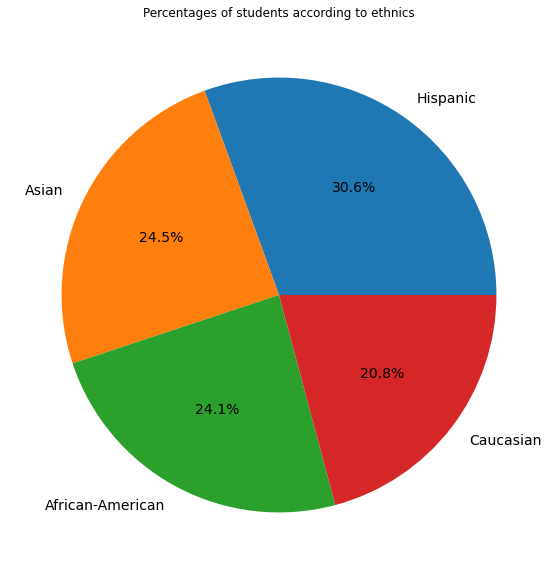

In [14]:
plt.figure(figsize = (10,10))
plt.pie(df.Ethnic.value_counts().values, labels = df.Ethnic.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 14})
plt.title('Percentages of students according to ethnics')
plt.show()

Majority of students are hispanic `30.6%` followed by Asian `24.5%`. Let's further examine the demographic of each ehnics.

In [15]:
grouped_eg = pd.pivot_table(df, index = 'Ethnic', columns = 'Gender', aggfunc = 'count', values = 'Score')

<Figure size 1440x1440 with 0 Axes>

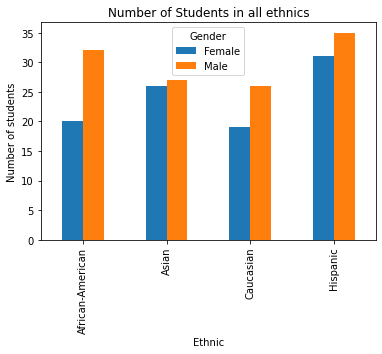

In [16]:
plt.figure(figsize = (20,20))
grouped_eg.plot(kind = 'bar')
plt.title('Number of Students in all ethnics')
plt.ylabel('Number of students')
plt.show()

In [17]:
grouped_eg

Gender,Female,Male
Ethnic,,
African-American,20,32
Asian,26,27
Caucasian,19,26
Hispanic,31,35


For each ethnics, there are more male students than female students.

## Average score overall

<AxesSubplot:xlabel='Method', ylabel='Score'>

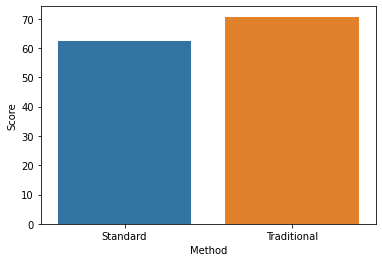

In [18]:
sns.barplot(x='Method', y = 'Score', data = df, ci = None)

In [19]:
print('Average score using Standard method: {}'.format(np.mean(df.Score[df.Method == 'Standard'])))
print('Average score using Traditional method: {}'.format(np.mean(df.Score[df.Method == 'Traditional'])))

Average score using Standard method: 62.33571428571429
Average score using Traditional method: 70.6842105263158


Overall, Traditional method result higher math score in average compared to standard method.

## Average score in ethnics

Text(0.5, 1.0, 'Average Math Score by Ethnics')

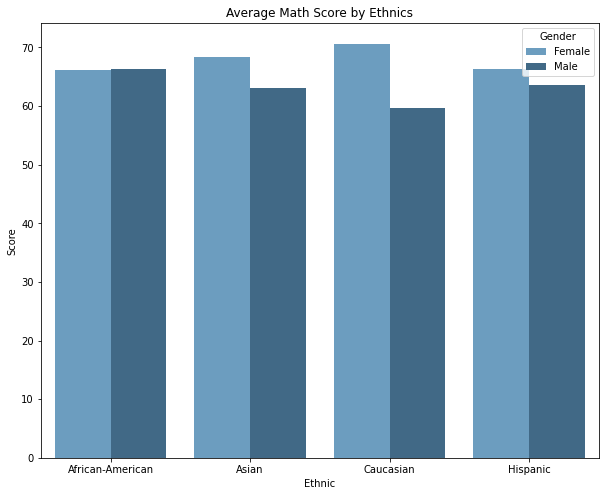

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Ethnic', y = 'Score', hue = 'Gender', data = df, ci = None, palette = 'Blues_d')
plt.title('Average Math Score by Ethnics')

In [21]:
np.round(pd.pivot_table(df, index = 'Gender', columns = 'Ethnic', values = 'Score'), 2)

Ethnic,African-American,Asian,Caucasian,Hispanic
Gender,,,,
Female,66.05,68.38,70.63,66.26
Male,66.34,63.11,59.73,63.54


If we dive into each of the ethnics, female students perform better compared to male students in Asian, Caucasian and Hispanic. However, male students in African-American perform slightly better than female students.

In [22]:
df_trad = df[df.Method == 'Traditional']
df_stan = df[df.Method == 'Standard']

Text(0.5, 1.0, 'average math score using traditional method')

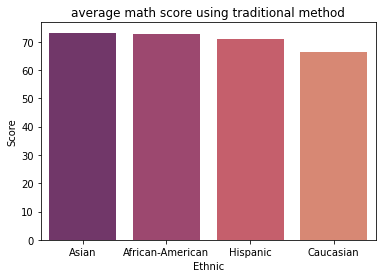

In [23]:
sns.barplot(data = df_trad, x='Ethnic', y='Score', ci=None, order = ['Asian', 'African-American', 'Hispanic', 'Caucasian'], palette = 'flare_r')
plt.title('average math score using traditional method')

In [24]:
np.round(df_trad.groupby('Ethnic')['Score'].mean(), 2)

Ethnic
African-American    72.89
Asian               73.19
Caucasian           66.32
Hispanic            70.83
Name: Score, dtype: float64

Most of the students got score on average above 70 using traditional method except caucasian students that only get on average 66.32%.

Text(0.5, 1.0, 'average math score using standard method')

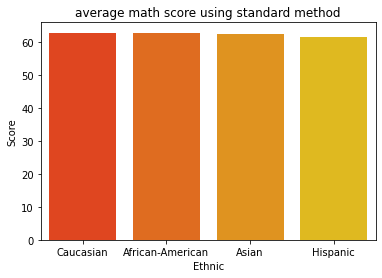

In [25]:
sns.barplot(data = df_stan, x='Ethnic', y='Score', ci=None, order = ['Caucasian', 'African-American', 'Asian', 'Hispanic'], palette = 'autumn')
plt.title('average math score using standard method')

In [26]:
np.round(df_stan.groupby('Ethnic')['Score'].mean(), 2)

Ethnic
African-American    62.71
Asian               62.46
Caucasian           62.88
Hispanic            61.60
Name: Score, dtype: float64

Using standard method, every students achieve score above 60% but still less compared to students learnt using traditional method.

## Average score by each teacher

<AxesSubplot:xlabel='Teacher', ylabel='Score'>

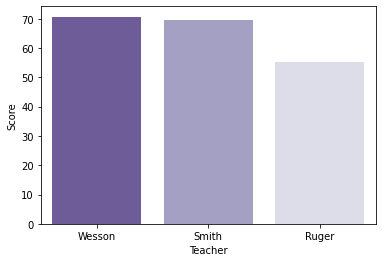

In [27]:
sns.barplot(x='Teacher', y = 'Score', data = df, ci = None, order = ['Wesson', 'Smith', 'Ruger'], palette = 'Purples_r')

In [28]:
df.groupby('Teacher')['Score'].mean()

Teacher
Ruger     55.267606
Smith     69.608696
Wesson    70.684211
Name: Score, dtype: float64

Overall, Wesson's method yield the highest average score.

## Average score in each ethnics by each teacher

In [29]:
pd.pivot_table(index = 'Teacher', columns = 'Ethnic', values = 'Score', data = df)

Ethnic,African-American,Asian,Caucasian,Hispanic
Teacher,,,,
Ruger,55.222222,53.705882,56.909091,55.640000
Smith,71.125000,69.900000,67.266667,69.888889
Wesson,72.888889,73.187500,66.315789,70.826087


Text(0.5, 1.0, 'Students performance compared to each teacher')

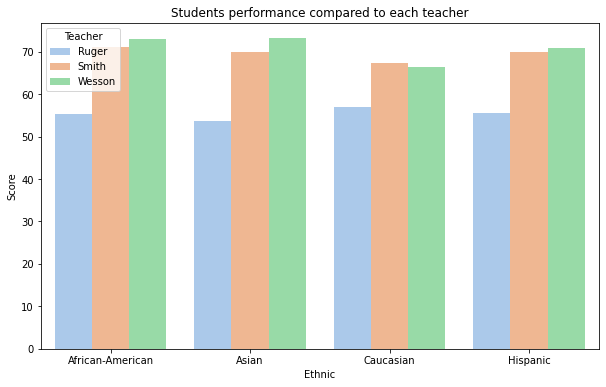

In [30]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Ethnic', y = 'Score', hue = 'Teacher', ci = None, palette = 'pastel')
plt.title('Students performance compared to each teacher')

African-American, Asian and Hispanic students who taught by Wesson achieve higher score compared to others. Meanwhile, Caucasian students who taught by Smith achieve high score. Clearly we can observe that students who taught by Ruger achieve low math score across all ethnics.

# Summary

In conclusion, traditional method indeed resulted higher math score for students of African-American, Asian and Hispanic. However, Smith's teaching method suits caucasian students as it yield slightly higher average score than wesson's. the analysis also showed that Ruger's teaching method resulted lower math score compared to others. Hence, it is not appropriate to make conclusion that traditional method is more superior because Smith's standard teaching method also yield high math score although it slightly lower than Wesson's traditional teaching method.

Thus, what the school should do is tackle the problem of Ruger's teaching capability at the school. Maybe the students' find it hard to understand what Ruger taught in class.